#Uygulama 6: K means Kümeleme Algoritması

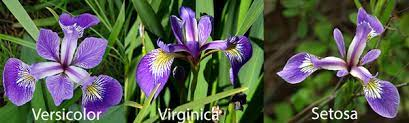

**Veri seti hakkında bilgi**<br>
Iris veri seti, bitki biliminde yaygın olarak kullanılan bir veri setidir ve üç farklı iris bitkisinin çiçek özelliklerini içermektedir. Veri seti, 1936 yılında Ronald Fisher tarafından yayınlanmıştır ve sınıflandırma ve kümeleme algoritmalarının performansını test etmek için sıkça kullanılmaktadır. Veri seti, 150 örneği ve dört özellik (çiçek yaprak uzunluğu, çiçek yaprak genişliği, çanak yaprak uzunluğu, çanak yaprak genişliği) içermektedir. Her örnek, üç farklı iris bitkisinden birine aittir: setosa, versicolor veya virginica. Iris veri seti, makine öğrenimi ve veri madenciliği alanlarında eğitim amaçlı sıkça kullanılmaktadır.


**Ön Hazırlık** 
*   Uyarıları kapatma

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

*   Gerekli kütüphaneleri yükleme

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

**1. Aşama: Veri Toplama**

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

**3. Aşama: Model Oluşturma**

*  k means kümeleme

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

 * Küme merkezlerini bulma


In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)


[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


**4.Aşama : Modeli Değerlendirme**

enetimli öğrenme modellerinde, eğitim verileri ile birlikte etiketler de sağlanır ve model, yeni bir veri örneği için doğru etiketi tahmin etmek için eğitilir. Ancak kümeleme uygulamalarında, herhangi bir etiket veya doğru cevap verisi yoktur ve model, benzerlik ölçüsüne göre örnekleri kümelere ayırmaya çalışır. Bu nedenle, kümeleme algoritmalarının doğru bir şekilde çalıştığını doğrulamak için farklı metrikler ve görselleştirme teknikleri kullanılır. 

Bir kümeleme modelinin performansını değerlendirmek için farklı yöntemler kullanılabilir. Bazı yaygın yöntemler şunlardır:

SSE (Sum of Squared Errors): SSE, her kümenin merkezinden uzaklıkların karelerinin toplamını ifade eder. Daha iyi bir kümeleme modeli, SSE değerinin düşük olması gerektiğini gösterir.

Silhouette Katsayısı: Silhouette katsayısı, kümeleme sonuçlarının kalitesini ölçmek için kullanılan bir metrikir. Değerleri -1 ile 1 arasında değişir ve 1'e yakın değerler daha iyi bir kümelemeyi gösterir.

Ayırma ve Birleştirme (Split and Merge): Bu yöntem, kümeleme sonuçlarının karşılaştırılması ve değerlendirilmesi için kullanılır. Önce veri seti büyük bir kümeleme yaparak alt kümelere ayrılır. Daha sonra, kümeleme sonuçları birleştirilir ve sonuçlar karşılaştırılır.

Görüntüleme: Küme merkezlerinin grafiksel olarak görüntülenmesi, kümeleme sonuçlarının değerlendirilmesinde faydalı olabilir. Her bir küme için bir renk atayarak veri noktalarını görselleştirebilirsiniz. Böylece, gerçek sınıf etiketleri ile karşılaştırarak, kümeleme sonuçlarının ne kadar doğru olduğunu gözlemleyebilirsiniz.

*   Model Performansı


In [ ]:
from sklearn.metrics import silhouette_score
y_pred = kmeans.predict(X)
silhouette_avg = silhouette_score(X, y_pred)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5528190123564095


Silhouette skoru, -1 ile 1 arasında bir değer alır. Skorun 1'e yakın olması, kümeleme işleminin iyi olduğunu gösterirken, skorun -1'e yakın olması, kümeleme işleminin kötü olduğunu gösterir. Skorun 0'a yakın olması ise, kümeleme işleminin hiçbir anlam ifade etmediğini gösterir.

Bu bağlamda, verilen Silhouette skoru 0.55 olarak değerlendirilebilir. Bu skor, kabul edilebilir bir düzeyde olup, kümeleme modelinin iyi bir performans sergilediğini gösterir.

Bu kodlar, KMeans kümeleme algoritması ile oluşturulan kümeleme sonuçlarını gerçek sınıf etiketleri ile karşılaştırmak amacıyla iki grafik yan yana çizdirmek için kullanılmaktadır.

İlk olarak plt.subplots(1, 2, figsize=(12, 5)) fonksiyonuyla 1 satır ve 2 sütunlu bir subplot oluşturulur ve bu figür fig değişkenine atanır. fig değişkeni ile değişken atama işlemi gerçekleştirilirken, aynı anda ax1 ve ax2 adında iki alt eksen değişkeni oluşturulur.

Daha sonra kmeans.labels_ dizisindeki her bir değerin rengini belirleyen kmeans_colors adında bir dizi oluşturulur. Burada, küme etiketleri 0, 1 ve 2 olduğundan, kmeans_colors dizisindeki sıralı üç renk tanımlanır.

ax1.scatter(X[:, 0], X[:, 1], c=kmeans_colors[kmeans.labels_], cmap='rainbow') kodu, ax1 alt ekseninde, küme etiketleri kmeans.labels_ dizisinde tanımlanmış olan her bir noktanın rengini kmeans_colors dizisinden alarak bir scatter grafiği çizdirir. Bu grafiğin renk paleti, 'rainbow' olarak belirtilir.

Ardından, küme merkezlerini temsil eden yıldız şeklindeki siyah noktalar ax1.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black') ile çizdirilir. Burada, centroids dizisindeki her bir koordinat çifti (x, y) bir merkez noktasını temsil eder ve bu koordinat çiftleri, centroids[:, 0] ve centroids[:, 1] ile sırayla alınır.

Son olarak, ax1.set_title("KMeans Kümeleme") ile grafik başlığı belirlenir.

class_colors adında bir dizi daha oluşturulur ve bu dizide de gerçek sınıf etiketleri için renkler tanımlanır. Ardından ax2.scatter(X[:, 0], X[:, 1], c=class_colors[y], cmap='rainbow') kodu ile gerçek sınıf etiketleri gösterilir. Burada y dizisi gerçek sınıf etiketlerini içermektedir.

Son olarak, ax2.set_title("Gerçek Sınıf Etiketleri") ile grafik başlığı belirlenir ve plt.show() fonksiyonu ile grafiğin ekrana çizdirilmesi sağlanır.

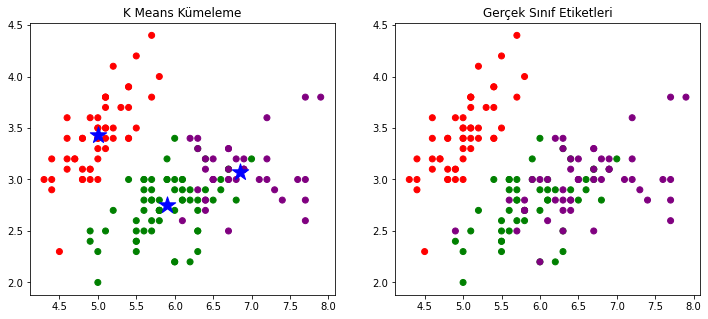

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
label_colors= np.array(['red','green','purple'])
ax1.scatter(X[:, 0], X[:, 1], c=label_colors[kmeans.labels_])
ax1.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='blue')
ax1.set_title("K Means Kümeleme")
ax2.scatter(X[:, 0], X[:, 1], c=label_colors[y])
ax2.set_title("Gerçek Sınıf Etiketleri")
plt.show()

**5.Aşama : Modeli Yayma**

*   Modeli yayma, kullanma

Kümeleme modelleri veri setinin anlaşılmasını, isimlendirilmemiş grupların belirlenmesini sağlar. Bulunan kümeler uygun bir şekilde isimlendirilerek sınıf etiketleri olarak kullanılabilir. Böylece sınıflandırma algortimalarının kullanımında bu veri setleri büyük kolaylık sağlar. Bunun dışında kümeleme yöntemlernin kullanım alanları şunlardır:
Pazarlama: Pazarlama departmanları, müşterileri farklı segmentlere ayırmak için kümeleme algoritmalarını kullanabilirler. Böylece, her bir müşteri segmentine özel pazarlama stratejileri oluşturabilirler.

Sağlık: Sağlık alanında, hastalıkların farklı kümeleri belirlenerek, bu kümelerdeki hastalıkların benzer özellikleri ve belirtileri tespit edilebilir. Bu sayede, hastalıkların teşhisi ve tedavisi daha hızlı ve etkili bir şekilde gerçekleştirilebilir.

Finans: Finans sektöründe, müşterilerin finansal davranışlarına göre farklı segmentlere ayrılması ve bu segmentlere özel finansal hizmetlerin sunulması mümkündür. Ayrıca, finansal risklerin belirlenmesi için de kümeleme algoritmaları kullanılabilir.

Sosyal Medya: Sosyal medya platformları, kullanıcıları farklı segmentlere ayırmak için kümeleme algoritmalarını kullanabilirler. Böylece, kullanıcılara özel içerikler ve reklamlar sunulabilir.

Coğrafi Analiz: Coğrafi verilerin analizi için kümeleme algoritmaları kullanılabilir. Örneğin, bir şehrin farklı semtleri veya mahalleleri benzer özelliklere sahipse, bu semtleri veya mahalleleri birbirinden ayırmak için kümeleme algoritmaları kullanılabilir.